# Import Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


# Data

## A -  Cases from Nigeria

In [2]:
NigCovidurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv'
NigCovid = pd.read_csv(NigCovidurl, thousands=',')


## B - Cases from John Hopkins Data Repository

In [3]:
globalconfirmedurl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
globalconfirmed = pd.read_csv(globalconfirmedurl)

recoveredurl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = pd.read_csv(recoveredurl)

globaldeathurl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
globaldeath = pd.read_csv(globaldeathurl)

#### Restructure date columns in global confirmed cases

In [7]:


globalconfirmedheaders = np.array(globalconfirmed.columns)[4:]  # Select all date columns

globalconfirmedheadersMain = np.array(globalconfirmed.columns)[:4]  # Select all none date columns

globalconfirmed_new = pd.melt(globalconfirmed, id_vars=globalconfirmedheadersMain,
                              value_vars=globalconfirmedheaders, var_name='Date', value_name='cases').groupby(
    by=['Province/State', 'Country/Region', 'Lat', 'Long',
        'Date']).sum().reset_index()  # Arrange all date columns to one column, date.



#### Restructure date columns in global recovered cases

In [8]:
recoveredheaders = np.array(recovered.columns)[4:]  # Select all date columns

recoveredheadersheadersMain = np.array(recovered.columns)[:4]  # Select all none date columns

recovered_new = pd.melt(recovered, id_vars=recoveredheadersheadersMain,
                        value_vars=recoveredheaders, var_name='Date', value_name='cases').groupby(
    by=['Province/State', 'Country/Region', 'Lat', 'Long',
        'Date']).sum().reset_index()  # Arrange all date columns to one column, date.


#### Restructure date columns in global recovered cases

In [9]:
globaldeathheaders = np.array(globaldeath.columns)[4:]  # Select all date columns

globaldeathheadersMain = np.array(globaldeath.columns)[:4]  # Select all none date columns

globaldeath_new = pd.melt(globaldeath, id_vars=globaldeathheadersMain,
                          value_vars=globaldeathheaders, var_name='Date', value_name='cases').groupby(
    by=['Province/State', 'Country/Region', 'Lat', 'Long',
        'Date']).sum().reset_index()  # Arrange all date columns to one column, date.



## C - External Data

In [10]:
Budgetdataurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'

RealGDPurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'

externalFileurl = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'

Budgetdata = pd.read_csv(Budgetdataurl)
RealGDP = pd.read_csv(RealGDPurl)
externalFile = pd.read_csv(externalFileurl)

## Task 2 -  View Data Properties

#### Reviewing First Five Data Points

In [11]:
print(NigCovid.head())
print('*' * 50, '\n')
print(globalconfirmed_new.head())
print('*' * 50, '\n')
print(recovered_new.head())
print('*' * 50, '\n')
print(globaldeath_new.head())
print('*' * 50, '\n')
print(Budgetdata.head())
print('*' * 50, '\n')
print(RealGDP.head())
print('*' * 50, '\n')
print(externalFile.head())
print('*' * 50, '\n')

  States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0           Lagos                         26708                         2435   
1             FCT                          9627                         2840   
2          Kaduna                          4504                          579   
3         Plateau                          4262                          280   
4             Oyo                          3788                          368   

   No. Discharged  No. of Deaths  
0           24037            236  
1            6694             93  
2            3877             48  
3            3948             34  
4            3374             46  
************************************************** 

  Province/State Country/Region      Lat      Long     Date   cases
0        Alberta         Canada  53.9333 -116.5765   1/1/21  100428
1        Alberta         Canada  53.9333 -116.5765   1/1/22  361623
2        Alberta         Canada  53.9333 -116.5765  

#### Reviewing Data info

In [12]:
print(NigCovid.info())
print('*' * 50, '\n')
print(globalconfirmed_new.info())
print('*' * 50, '\n')
print(recovered_new.info())
print('*' * 50, '\n')
print(globaldeath_new.info())
print('*' * 50, '\n')
print(Budgetdata.info())
print('*' * 50, '\n')
print(RealGDP.info())
print('*' * 50, '\n')
print(externalFile.info())
print('*' * 50, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB
None
************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79779 entries, 0 to 79778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79779 non-null  object 
 1   Country/Region  79779 non-null  object 
 2   Lat             79779 non-null  float64
 3   Long            79779 non-null  float64
 4   D

## Task 3 - Data Cleaning and Preparation

### Convert to appropriate data type

#### converter into date types

In [14]:
globalconfirmed_new['Date'] = pd.to_datetime(globalconfirmed_new['Date'])

recovered_new['Date'] = pd.to_datetime(recovered_new['Date'])

globaldeath_new['Date'] = pd.to_datetime(globaldeath_new['Date'])

#### Remove commas from scrapped data

In [15]:
#NigCovid[1:] = NigCovid[1:].replace(',','')
print(NigCovid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB
None


#### Rename columns in the Nigeria COVID-19 Data

In [16]:
Nigcovidheaders = np.array(NigCovid.columns)  #
NigCovid.rename(columns={Nigcovidheaders[0]: 'States',
                         Nigcovidheaders[1]: 'Confirmed',
                         Nigcovidheaders[2]: 'Admissions',
                         Nigcovidheaders[3]: 'Discharged',
                         Nigcovidheaders[4]: 'Deaths'}, inplace=True)

#### Remove comma(,) in numerical data
#### Look into this

In [ ]:
#NigCovid.astype({'Confirmed':'float','Admissions':'float','Discharged':'str','Deaths':'str'})
# list(Nigcovidheaders[1:])
#NigCovid[list(Nigcovidheaders[1:])]= NigCovid.Confirmed.astype(int)
#NigCovid['Confirmed'].replace(',',regex=True,inplace=True)
##NigCovid.Confirmed = NigCovid.Confirmed.astype(float)
##print(NigCovid.info())

In [ ]:
## Save csv

'''

NigCovid.to_csv('NigCovid.csv')
globalconfirmed_new.to_csv('globalconfirmed_new.csv')
recovered_new.to_csv('recovered_new.csv')
globaldeath_new.to_csv('globaldeath_new.csv')
Budgetdata.to_csv('Budgetdata.csv')
RealGDP.to_csv('RealGDP.csv')
externalFile.to_csv('externalFile.csv')

'''

#### Extract daily data for Nigeria from the Global daily cases data
#### look into countries present in the data set

In [17]:
print(globalconfirmed_new['Country/Region'].unique())
# no Nigeria present in the data
country = 'Nigeria'
Nigeria = globalconfirmed_new[globalconfirmed_new['Country/Region'] == country]
print(Nigeria)

['Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia' 'New Zealand'
 'Denmark' 'France']
Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, cases]
Index: []


# Task 4 - Analysis
### Confirmed Covid cases by Laboratory test

    States  Confirmed
0    Lagos      26708
1      FCT       9627
2   Kaduna       4504
3  Plateau       4262
4      Oyo       3788
5   Rivers       3279
6      Edo       2768
7     Ogun       2382
8     Kano       2032
9    Delta       1843
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   States     10 non-null     object
 1   Confirmed  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


<Figure size 2880x2160 with 0 Axes>

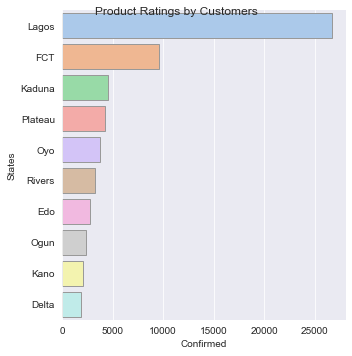

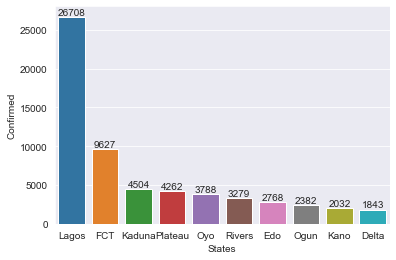

In [18]:
#print(NigCovid)

Top_10_Confirmed = NigCovid.nlargest(10, columns=['Confirmed'])[['States', 'Confirmed']]
print(Top_10_Confirmed)
print(Top_10_Confirmed.info())
plt.figure(figsize=(40, 30))
g = sns.catplot(x='Confirmed', y="States", kind="bar",
                palette="pastel", edgecolor=".6", errwidth=0,
                data=Top_10_Confirmed).fig.suptitle('Product Ratings by Customers')
plt.show()

b = sns.barplot(x="States", y='Confirmed', data=Top_10_Confirmed)
plt.bar_label(b.containers[0])
plt.show()

In [ ]:
##ggplot(Top_10_Confirmed,aes(x = 'States')) + geom_col(y= 'Confirmed') + geom_bar() + coord_flip()